In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from function import PiecewiseFunction
from network import TreeNode
import numpy as np
import matplotlib.pyplot as plt

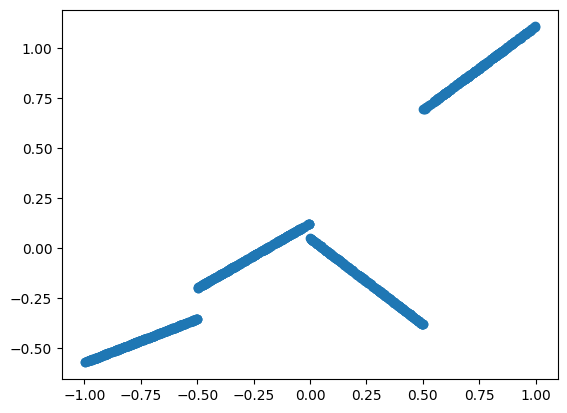

In [3]:
piecewise_func = PiecewiseFunction(lower_bound=-1, upper_bound=1, num_splits=4)

# Sample dataset
inputs = np.random.uniform(-1, 1, 1000)
outputs = np.array([piecewise_func(x) for x in inputs])

# Plot the dataset
plt.scatter(inputs, outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader

# simple dataset given inputs and outputs
class SimpleDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # convert to float32 and torch tensor
        return np.array([self.inputs[idx]]).astype(np.float32), np.array([self.outputs[idx]]).astype(np.float32)


In [5]:
dims = [1, 10, 10, 1]
temperature = 0.5

model = TreeNode(dims, temperature=temperature)
train_dataset = SimpleDataset(inputs, outputs)

In [6]:
from torch.optim import Adam
from torch.nn import MSELoss

# simple training loop
epochs = 250
batch_size = 64
lr = 1e-4
optimizer = Adam(model.parameters(), lr=lr)
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loss_fn = MSELoss()
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # loss = loss_fn(model(x), y)
        loss = model.expected_loss(x, x.clone(), y, loss_fn).mean()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss.item()}")




Epoch 0, Loss 0.8169946670532227
Epoch 1, Loss 0.5377587080001831
Epoch 2, Loss 0.4821317791938782
Epoch 3, Loss 0.47576889395713806
Epoch 4, Loss 0.5165813565254211
Epoch 5, Loss 0.6017078161239624
Epoch 6, Loss 0.40914496779441833
Epoch 7, Loss 0.29369720816612244
Epoch 8, Loss 0.3929513096809387
Epoch 9, Loss 0.3278655409812927
Epoch 10, Loss 0.33879297971725464
Epoch 11, Loss 0.33434775471687317
Epoch 12, Loss 0.28785860538482666
Epoch 13, Loss 0.30567091703414917
Epoch 14, Loss 0.23323293030261993
Epoch 15, Loss 0.2440299093723297
Epoch 16, Loss 0.2867685556411743
Epoch 17, Loss 0.30135542154312134
Epoch 18, Loss 0.15468575060367584
Epoch 19, Loss 0.193352609872818
Epoch 20, Loss 0.18422572314739227
Epoch 21, Loss 0.16128556430339813
Epoch 22, Loss 0.13305135071277618
Epoch 23, Loss 0.13494092226028442
Epoch 24, Loss 0.1797901690006256
Epoch 25, Loss 0.1275298148393631
Epoch 26, Loss 0.11631883680820465
Epoch 27, Loss 0.1470266729593277
Epoch 28, Loss 0.160634383559227
Epoch 29, L

{'LL': 0, 'LR': 1, 'RR': 2, 'RL': 3}


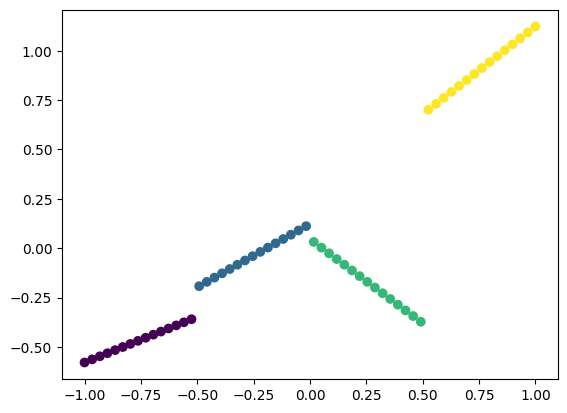

In [7]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 60)
model.eval()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    # y, label = model(torch.tensor([[x]]).float())
    x_tensor = torch.tensor([[x]]).float()
    y, label = model.inference(x_tensor, x_tensor.clone())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()

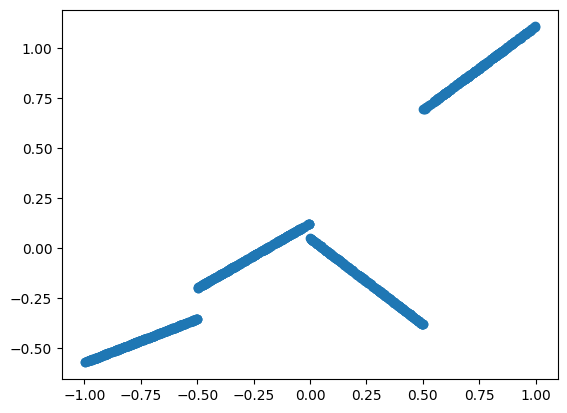

In [8]:
# Plot the dataset
plt.scatter(inputs, outputs)
plt.show()